# Bibliotecas

In [325]:
import pandas as pd
import seaborn as sns
import itertools

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Datasets

In [326]:
body_splash_a = pd.read_csv('../perfumaria/dados/body_splash_a.csv')
body_splash_j = pd.read_csv('../perfumaria/dados/body_splash_j.csv')
antitranspirante_a = pd.read_csv('../perfumaria/dados/antitranspirante_a.csv')
antitranspirante_j = pd.read_csv('../perfumaria/dados/antitranspirante_j.csv')
shampoo_a = pd.read_csv('../perfumaria/dados/shampoo_a.csv')
shampoo_j = pd.read_csv('../perfumaria/dados/shampoo_j.csv')
sabonete_a = pd.read_csv('../perfumaria/dados/sabonete_a.csv')
sabonete_j = pd.read_csv('../perfumaria/dados/sabonete_j.csv')

### Body Splash

In [327]:
body_splash_a['loja'] = 'avon'
body_splash_j['loja'] = 'jequiti'

In [328]:
# concatenando dataframes #
body_splash= pd.concat([body_splash_a,body_splash_j])
#  #  #  #

# removendo a coluna 'Unnamed: 0' #
body_splash = body_splash.drop(columns={'Unnamed: 0'})
#  #  #  #

In [329]:
# transformando str em float #
body_splash['preco'] = body_splash['preco'].astype(float)
#  #  #  #

In [330]:
# ordenando preços #
body_splash = body_splash.sort_values('preco')
#  #  #  #

In [331]:
# estatistica #
analise_bs = body_splash.groupby('loja').describe()['preco']
analise_bs = analise_bs.drop(columns={'count'})
analise_bs
#  #  #  #

,mean,std,min,25%,50%,75%,max
loja,,,,,,,
avon,22.140,12.559817,0.00,12.39,23.99,23.990,44.90
jequiti,36.885,0.850000,36.46,36.46,36.46,36.885,38.16


In [332]:
# tranformando describe #
transform_describe = pd.DataFrame(columns=['loja', 'atributo', 'valor'])
for loja, atributo in itertools.product(analise_bs.index, analise_bs.columns):
    valor = analise_bs.at[loja, atributo]
    transform_describe = transform_describe.append({'loja': loja, 'atributo': atributo, 'valor': valor},
                           ignore_index=True)
    
transform_describe.head(3)
#  #  #  #

,loja,atributo,valor
0,avon,mean,22.140000
1,avon,std,12.559817
2,avon,min,0.000000


#### Analises 

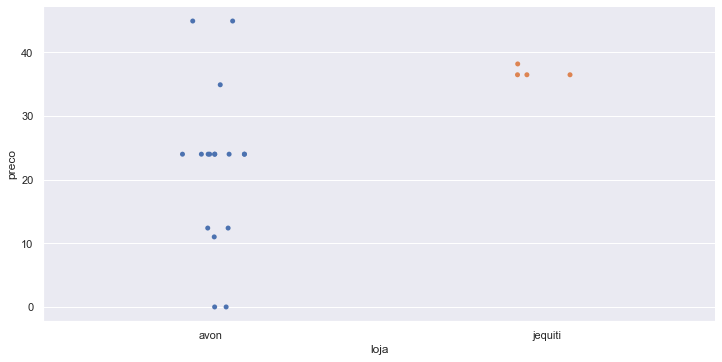

In [333]:
sns.catplot(x='loja', y='preco', data=body_splash, height=5, aspect=2)

O gráfico mostra a distruibuição de preços de body splashs de cada loja, sendo possivel observar como estão sendo espalhados os preços dos produtos. A partir de uma perspectiva mais analítica, é visivel que a Avon possui uma distruibuição de preço mais 'espalhada' em relaçao a Jequiti, englobando maiores faixas de preço, logo, a Avon possui um arsenal maior de body splash. 

<AxesSubplot:xlabel='loja', ylabel='preco'>

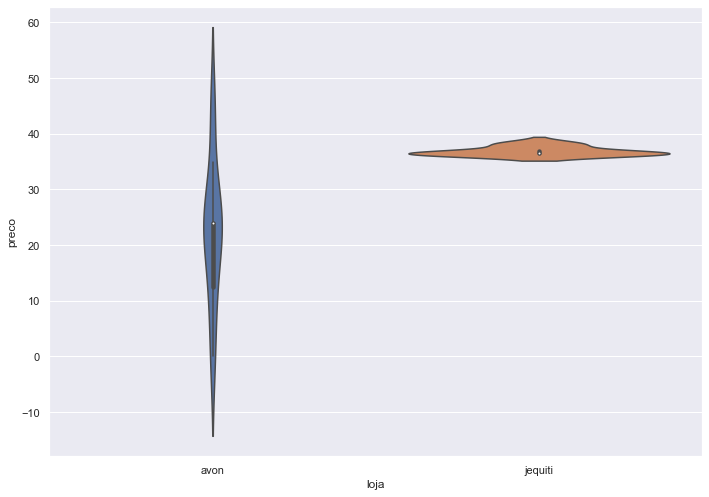

In [334]:
sns.violinplot(x='loja', y='preco', data=body_splash)

É possivel notar que cada uma das lojas possui uma concentração de preços em diferentes faixas, a Jequiti possui uma expressiva quantidade de produtos na faixa de R$ 35,00, enquanto os preços da Avon se concentram mais uniformimente em diferentes faixas. A partir desse gráfico, também é possível visualizar de forma clara o piso e o teto de cada loja.

Obs: considerei como "0,0" produtos que estavam indisponiveis, logo, é possível notar que a Avon possui alguns produtos indisponiveis no estoque enquanto a Jequiti está com todos os produtos disponiveis.

<AxesSubplot:xlabel='loja', ylabel='preco'>

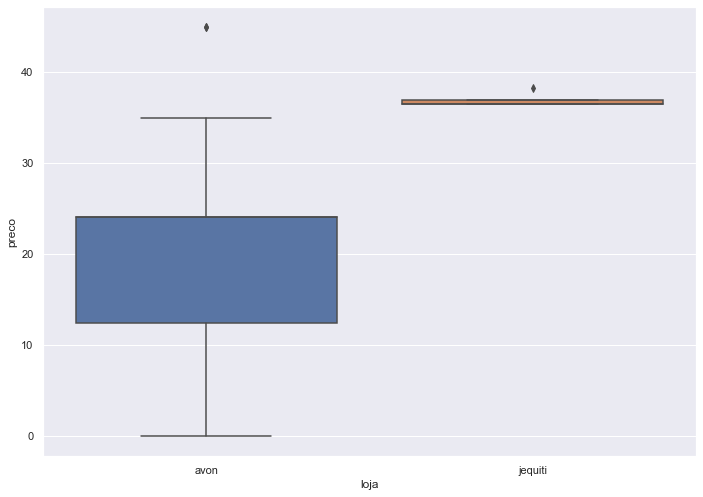

In [335]:
sns.boxplot(x='loja', y='preco', data=body_splash)

Neste gráfico podemos observar o bloco de agrupamento dos preços, por exemplo, a Jequiti possui uma caixa mais achatada, nos dizendo que a informação daquela parte dos preços é de alta previsibilidade, ao mesmo tempo em que há pouca variabilidade. A loja da Avon, pelo contrário, é que possui maior variabilidade , enquanto que sua previsibilidade torna-se um pouco mais escassa.

<AxesSubplot:xlabel='atributo', ylabel='valor'>

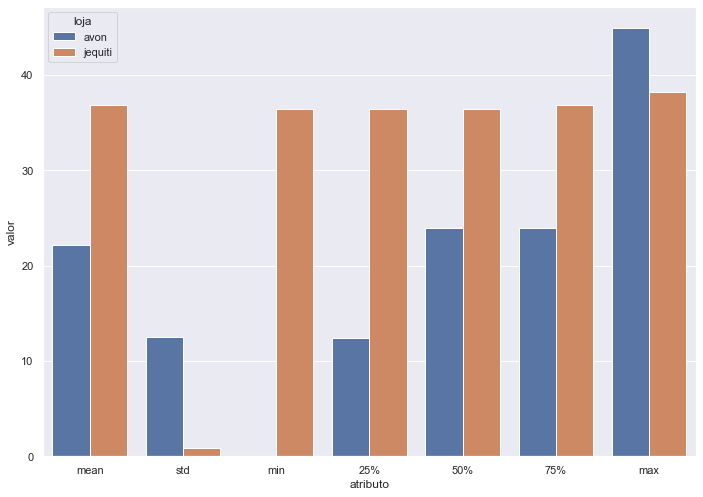

In [336]:
sns.barplot(x= 'atributo', y = 'valor', hue = 'loja', data = transform_describe)

O maior desvio padrao é da avon, confirmando a análise anterior no boxplot.

### Antitranspirante

In [337]:
antitranspirante_a['loja'] = 'avon'
antitranspirante_j['loja'] = 'jequiti'

In [338]:
# concatenando dataframes #
antitranspirante = pd.concat([antitranspirante_a,antitranspirante_j])
#  #  #  #

# removendo a coluna 'Unnamed: 0' #
antitranspirante = antitranspirante.drop(columns={'Unnamed: 0'})
#  #  #  #

In [339]:
# transformando str em float #
antitranspirante['preco'] = antitranspirante['preco'].astype(float)
#  #  #  #

In [340]:
# ordenando preços #
antitranspirante = antitranspirante.sort_values('preco')
#  #  #  #

In [341]:
# estatistica #
analise_a = antitranspirante.groupby('loja').describe()['preco']
analise_a = analise_a.drop(columns={'count'})
analise_a
#  #  #  #

,mean,std,min,25%,50%,75%,max
loja,,,,,,,
avon,8.507045,4.381229,0.00,6.99,6.99,7.99,17.99
jequiti,26.618750,36.258019,11.82,11.82,14.36,16.91,149.90


In [342]:
# tranformando describe #
transform_describe = pd.DataFrame(columns=['loja', 'atributo', 'valor'])
for loja, atributo in itertools.product(analise_a.index, analise_a.columns):
    valor = analise_a.at[loja, atributo]
    transform_describe = transform_describe.append({'loja': loja, 'atributo': atributo, 'valor': valor},
                           ignore_index=True)
    
transform_describe.head(3)
#  #  #  #

,loja,atributo,valor
0,avon,mean,8.507045
1,avon,std,4.381229
2,avon,min,0.000000


#### Analises

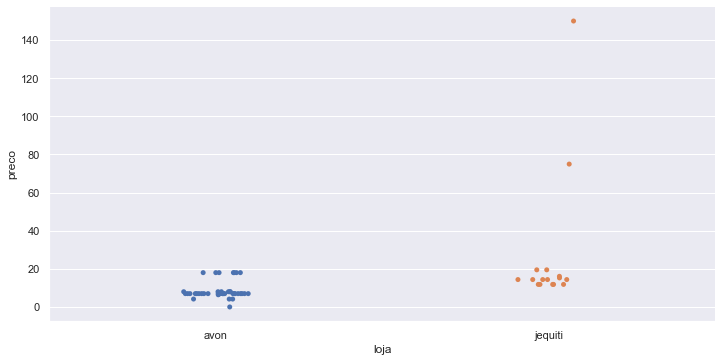

In [343]:
sns.catplot(x='loja', y='preco', data=antitranspirante, height=5, aspect=2)

A distribuição de preços de antitranspirantes de cada loja não está tao diferente, embora a Jequiti tenha alguns outliers.

<AxesSubplot:xlabel='loja', ylabel='preco'>

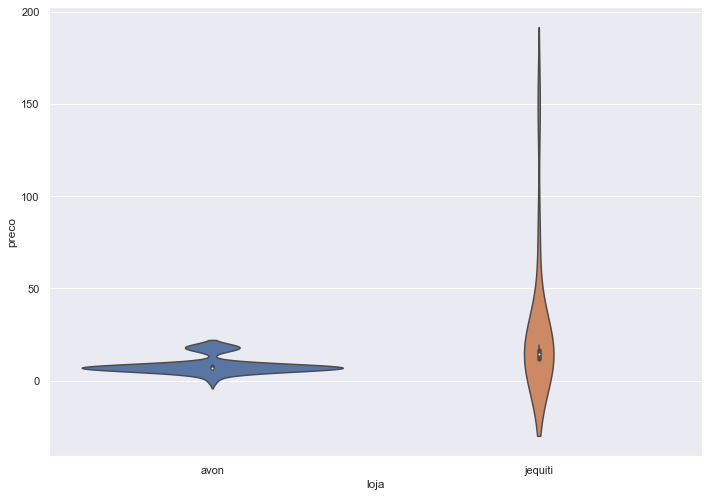

In [344]:
sns.violinplot(x='loja', y='preco', data=antitranspirante)

É possivel notar que cada uma das lojas possui uma concentração de preços que não estão tao distantes de uma loja para outra, porem a Avon possui maior concentração de preços em uma determinada faixa enquanto a Jequiti se concentra de forma mais uniforme em outras faixas de preço, o que significa uma maior variabilidade de preços.

<AxesSubplot:xlabel='loja', ylabel='preco'>

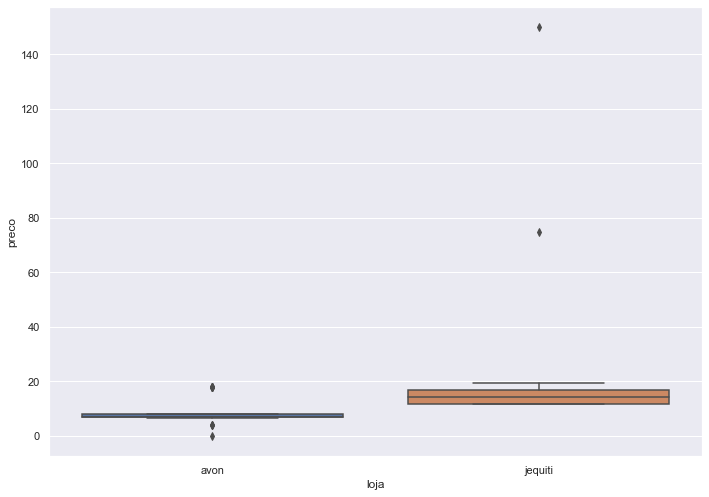

In [345]:
sns.boxplot(x='loja', y='preco', data=antitranspirante)

A Avon possui uma caixa mais achatada, nos dizendo que a informação daquela parte dos preços é de alta previsibilidade, ao mesmo tempo em que há pouca variabilidade de preço.

<AxesSubplot:xlabel='atributo', ylabel='valor'>

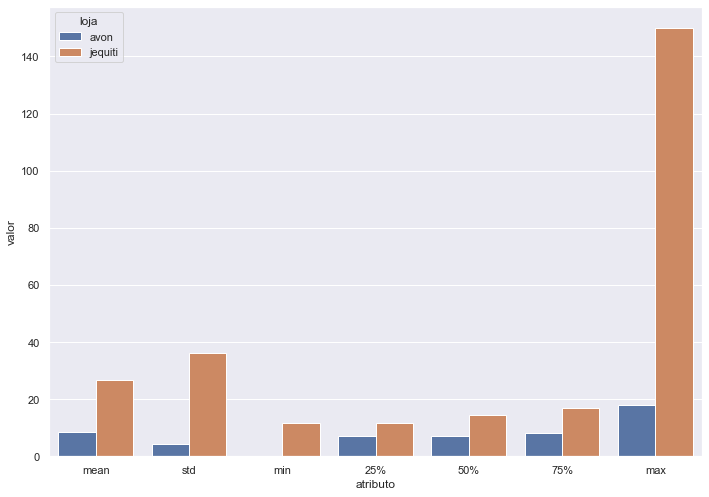

In [346]:
sns.barplot(x= 'atributo', y = 'valor', hue = 'loja', data = transform_describe)

O maior desvio padrao é da Jequiti, confirmando a análise anterior no boxplot.

### Shampoo

In [347]:
shampoo_a['loja'] = 'avon'
shampoo_j['loja'] = 'jequiti'

In [348]:
# concatenando dataframes #
shampoo = pd.concat([shampoo_a,shampoo_j])
#  #  #  #

# removendo a coluna 'Unnamed: 0' #
shampoo = shampoo.drop(columns={'Unnamed: 0'})
#  #  #  #

In [349]:
# transformando str em float #
shampoo['preco'] = shampoo['preco'].astype(float)
#  #  #  #

In [350]:
# ordenando preços #
shampoo = shampoo.sort_values('preco')
#  #  #  #

In [351]:
# estatistica #
analise_sh = shampoo.groupby('loja').describe()['preco']
analise_sh = analise_sh.drop(columns={'count'})
analise_sh
#  #  #  #

,mean,std,min,25%,50%,75%,max
loja,,,,,,,
avon,15.148824,11.909970,0.00,1.875,16.99,19.99,49.99
jequiti,48.255500,37.783034,11.82,23.925,31.80,64.90,149.94


In [352]:
# tranformando describe #
transform_describe = pd.DataFrame(columns=['loja', 'atributo', 'valor'])
for loja, atributo in itertools.product(analise_a.index, analise_a.columns):
    valor = analise_a.at[loja, atributo]
    transform_describe = transform_describe.append({'loja': loja, 'atributo': atributo, 'valor': valor},
                           ignore_index=True)
    
transform_describe.head(3)
#  #  #  #

,loja,atributo,valor
0,avon,mean,8.507045
1,avon,std,4.381229
2,avon,min,0.000000


#### Analises

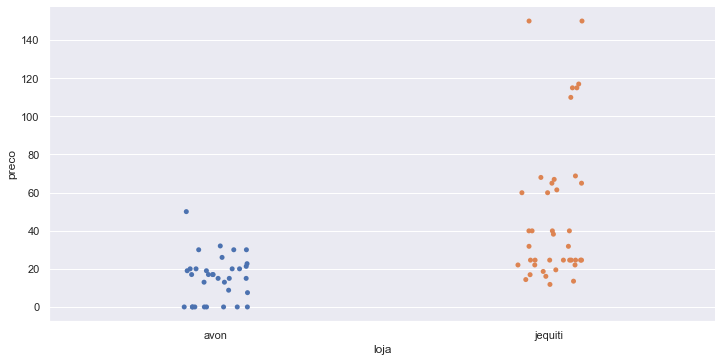

In [353]:
sns.catplot(x='loja', y='preco', data=shampoo, height=5, aspect=2)

Os preços da Jequiti estão mais espalhados, o que significa mais variabilidade de preços enquanto os da Avon estão mais condensados.

<AxesSubplot:xlabel='loja', ylabel='preco'>

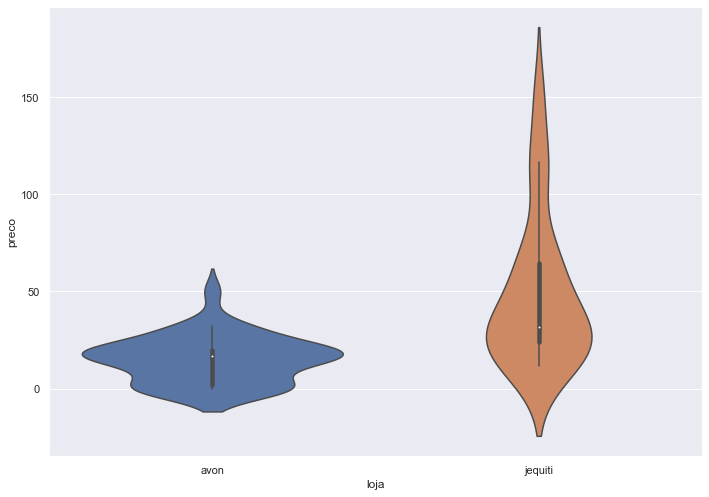

In [354]:
sns.violinplot(x='loja', y='preco', data=shampoo)

A Avon possui maior concentração de preços em uma determinada faixa enquanto a Jequiti se concentra de forma mais uniforme em outras faixas de preço, o que significa uma maior variabilidade de preços.

<AxesSubplot:xlabel='loja', ylabel='preco'>

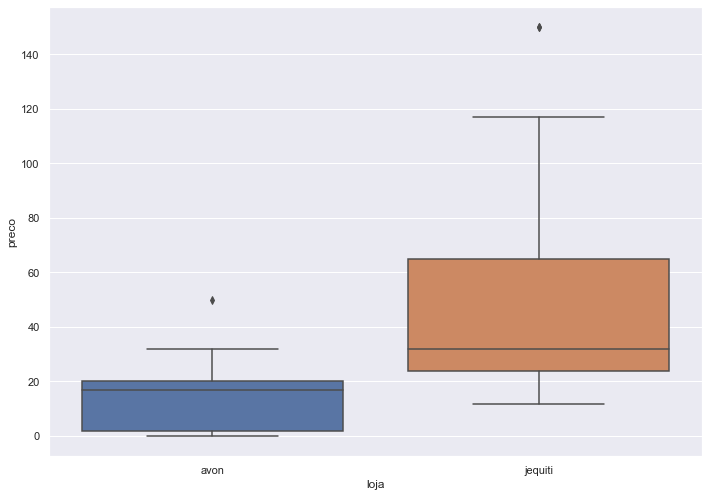

In [355]:
sns.boxplot(x='loja', y='preco', data=shampoo)

A Avon possui uma caixa mais achatada, nos dizendo que a informação daquela parte dos preços é de alta previsibilidade, ao mesmo tempo em que há pouca variabilidade de preço.

<AxesSubplot:xlabel='atributo', ylabel='valor'>

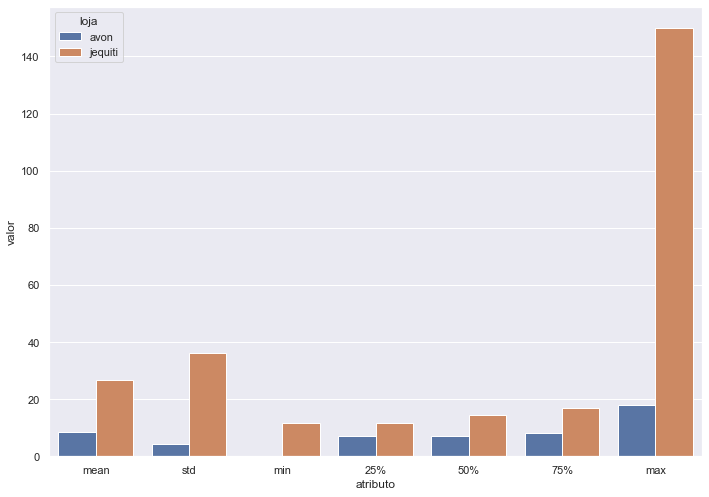

In [356]:
sns.barplot(x= 'atributo', y = 'valor', hue = 'loja', data = transform_describe)

O maior desvio padrao é da Jequiti, confirmando a análise anterior no boxplot.

### Sabonete

In [357]:
sabonete_a['loja'] = 'avon'
sabonete_j['loja'] = 'jequiti'

In [358]:
# concatenando dataframes #
sabonete = pd.concat([sabonete_a,sabonete_j])
#  #  #  #

# removendo a coluna 'Unnamed: 0' #
sabonete = sabonete.drop(columns={'Unnamed: 0'})
#  #  #  #

In [359]:
# transformando str em float #
sabonete['preco'] = sabonete['preco'].astype(float)
#  #  #  #

In [360]:
# ordenando preços #
sabonete = sabonete.sort_values('preco')
#  #  #  #

In [361]:
# estatistica #
analise_sa = sabonete.groupby('loja').describe()['preco']
analise_sa = analise_sa.drop(columns={'count'})
analise_sa
#  #  #  #

,mean,std,min,25%,50%,75%,max
loja,,,,,,,
avon,17.071731,7.682181,0.00,12.49,17.99,21.99,33.9
jequiti,33.910909,29.557159,2.72,18.19,20.32,59.66,116.9


In [362]:
# tranformando describe #
transform_describe = pd.DataFrame(columns=['loja', 'atributo', 'valor'])
for loja, atributo in itertools.product(analise_sa.index, analise_sa.columns):
    valor = analise_sa.at[loja, atributo]
    transform_describe = transform_describe.append({'loja': loja, 'atributo': atributo, 'valor': valor},
                           ignore_index=True)
    
transform_describe.head(3)
#  #  #  #

,loja,atributo,valor
0,avon,mean,17.071731
1,avon,std,7.682181
2,avon,min,0.000000


#### Analises

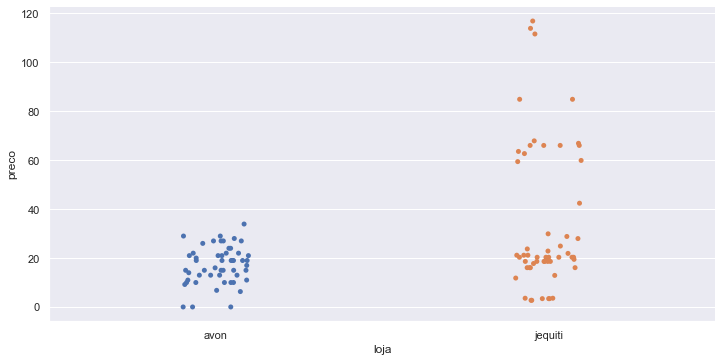

In [363]:
sns.catplot(x='loja', y='preco', data=sabonete, height=5, aspect=2)

Os preços da Jequiti estão mais espalhados, o que significa mais variabilidade de preços enquanto os da Avon estão mais condensados.

<AxesSubplot:xlabel='loja', ylabel='preco'>

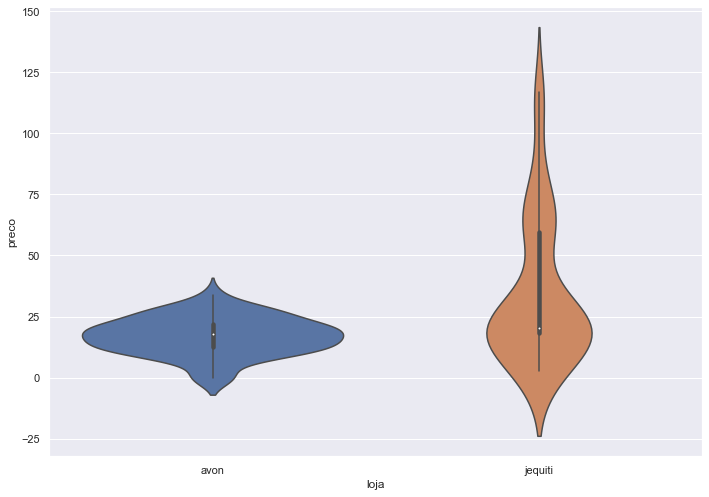

In [364]:
sns.violinplot(x='loja', y='preco', data=sabonete)

A Avon possui maior concentração de preços em uma determinada faixa enquanto a Jequiti se concentra de forma mais uniforme em outras faixas de preço, o que significa uma maior variabilidade de preços.

<AxesSubplot:xlabel='loja', ylabel='preco'>

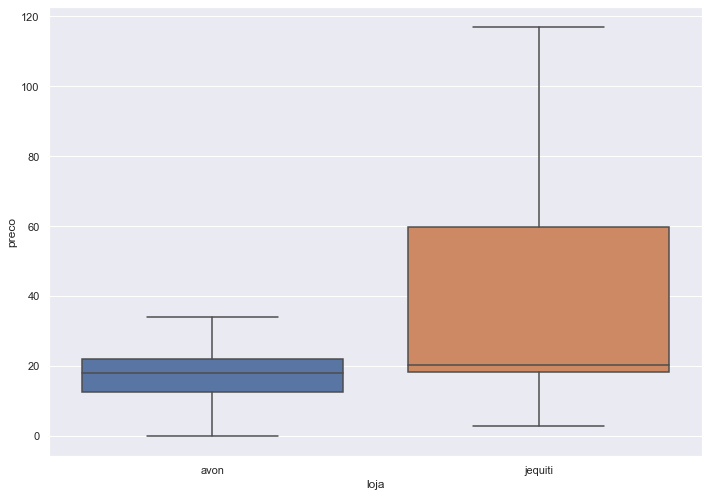

In [365]:
sns.boxplot(x='loja', y='preco', data=sabonete)

A Avon possui uma caixa mais achatada, nos dizendo que a informação daquela parte dos preços é de alta previsibilidade, ao mesmo tempo em que há pouca variabilidade de preço.

<AxesSubplot:xlabel='atributo', ylabel='valor'>

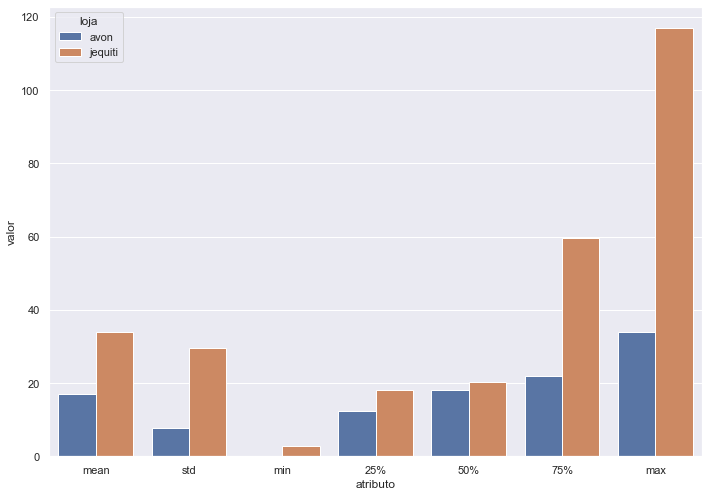

In [366]:
sns.barplot(x= 'atributo', y = 'valor', hue = 'loja', data = transform_describe)

O maior desvio padrao é da Jequiti, confirmando a análise anterior no boxplot.

# Conclusão

Ambas empresas são do mesmo segmento porém, possuem estrategias de preço divergente, a Jequiti com preços mais variados e até mais elevados, enquanto a Avon possui menor variabilidade de preço e preços menores. A jequiti tem como publico alvo a classe C, enquanto a Avon tem como publico alvo a classe C e D, por isso a divergencia entre preços.